In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# RSNA Dataset EDA

In [2]:
train_df = pd.read_csv("./train.csv")
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

**54706 images are present, laterality and views are present for all images. </br>
density is provided for 29470 only, age for 54669 (good almost all the images), and BIRADS for 26286 which is almost half the images present.**

In [4]:
train_df.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


Checking the unique patient IDs in the dataset </br> **so we have 54706 images belonging to 11913 unique cases. The data is collected across two sites from different 10 mammography machines**

In [5]:
print(train_df['patient_id'].nunique())
print(train_df['site_id'].nunique())
print(train_df['machine_id'].nunique())

11913
2
10


as we can see below the dataset is extremely imbalanced, will calculate the ratio in further analysis below

In [6]:
train_df.groupby('cancer').count()

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
cancer,,,,,,,,,,,,,
0,53548,53548,53548,53548,53548,53511,53548,53548,25622,53548,28806,53548,53548
1,1158,1158,1158,1158,1158,1158,1158,1158,664,1158,664,1158,1158


How many unique patients in each class?

In [7]:
train_df.groupby('cancer').nunique()

,site_id,patient_id,image_id,laterality,view,age,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
cancer,,,,,,,,,,,,,
0,2,11907,53548,2,6,63,2,1,3,2,4,10,2
1,2,486,1158,2,3,50,1,2,1,2,4,8,1


looks like the some patients are found in both cancer and normal, which makes sense since the cancer mostly occur in one breast. Let's confirm this

In [8]:
cancer_df = train_df.query('cancer == 1')
normal_df = train_df.query('cancer == 0')

print(cancer_df.shape, normal_df.shape)

(1158, 14) (53548, 14)


In [9]:
cancer_unique_ids = list(cancer_df['patient_id'].unique())
normal_unique_ids = list(normal_df['patient_id'].unique())

any(i in cancer_unique_ids for i in normal_unique_ids)


True

Let's gather some data insights and distributions

### Cancer diagnosis  distribution

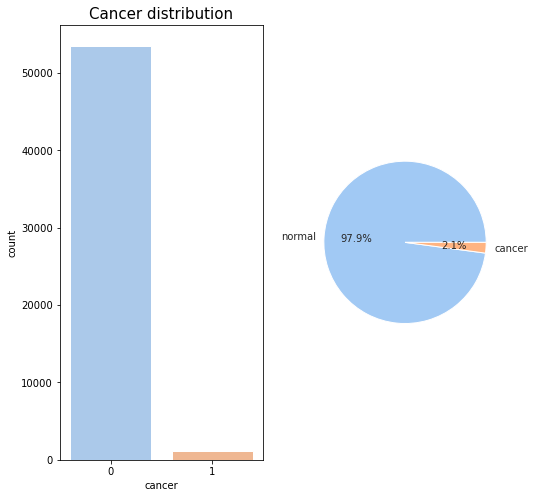

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
sns.set_style("dark", {'axes.grid' : False})
colors = sns.color_palette('pastel')
# bar plot
splot = sns.countplot(ax = axes[0], x = train_df['cancer'], palette='pastel')
splot.set_title("Cancer distribution", fontsize = 15)
# pie chart
s = train_df['cancer'].value_counts()
axes[1].pie(s, autopct="%.1f%%", labels = ['normal', 'cancer'], colors=colors);

### Age distribution for unique patient ids

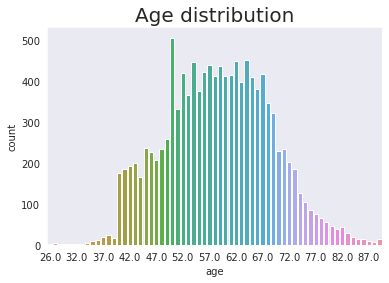

In [11]:
splot = sns.countplot(x = train_df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0]))
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("dark", {'axes.grid' : False})
splot.set_title("Age distribution", fontsize = 20)
splot.set_xticks(range(0, int(train_df['age'].max() - train_df['age'].min()), 5)); 

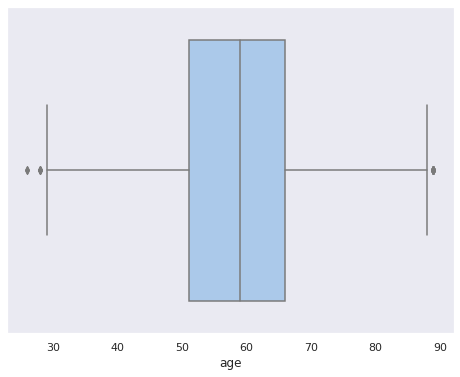

In [12]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("dark", {'axes.grid' : False})
sns.boxplot(x=train_df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0]), palette='pastel');

**The age looks normally distributed with most cases lying in the range of [50,70]. This makes sense since most countries recommend screening after 40** </br> let's explore the distribution for normal vs cancer

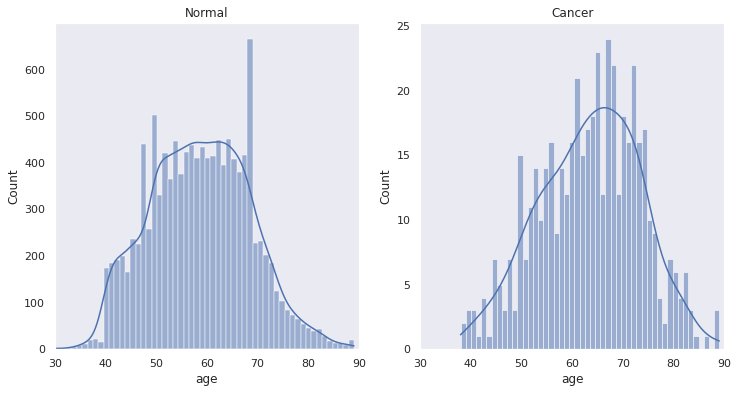

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
splot = sns.histplot(ax = axes[0], x = normal_df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0]),bins=60, kde=True)
axes[0].set_title("Normal")
axes[0].set_xlim(30, 90)
splot = sns.histplot(ax = axes[1], x = cancer_df.groupby('patient_id')['age'].apply(lambda x: x.unique()[0]), bins=50,kde=True)
axes[1].set_title("Cancer")
axes[1].set_xlim(30, 90);

### Breast density distribution in the dataset

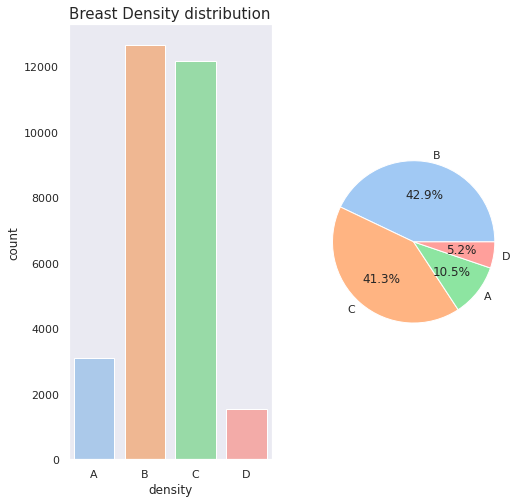

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# bar plot
splot = sns.countplot(ax = axes[0], x = train_df['density'], order = ['A', 'B', 'C', 'D'],palette='pastel')
splot.set_title("Breast Density distribution", fontsize = 15)
# pie chart
s = train_df['density'].value_counts()
axes[1].pie(s, autopct="%.1f%%", labels = s.keys(), colors=colors);

**While the distribution is imbalanced it reflects the true distribution where most women have B (scatterly dense) or C (heterogeneously dense)**

### Breast density distribution in normal vs cancer

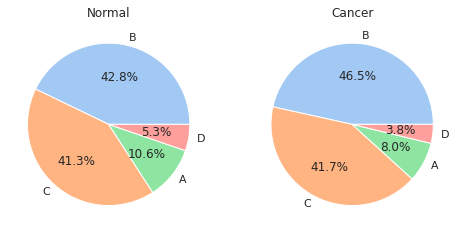

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# pie chart
s_normal= normal_df['density'].value_counts()
axes[0].pie(s_normal, autopct="%.1f%%", labels = s_normal.keys(), colors=colors)
axes[0].set_title("Normal")

s_cancer = cancer_df['density'].value_counts()
axes[1].pie(s_cancer, autopct="%.1f%%", labels = s_cancer.keys(), colors=colors)
axes[1].set_title("Cancer");

### Mammogram view distribution

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("dark", {'axes.grid' : False})

Text(0.5, 1.0, 'View distribution')

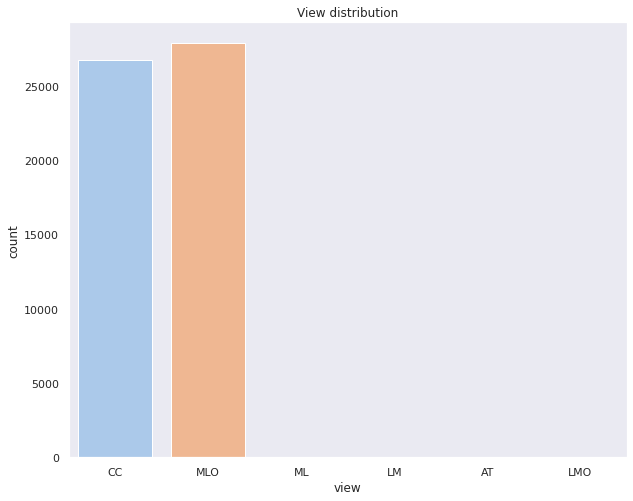

In [17]:
splot = sns.countplot(x = train_df['view'], palette='pastel')
splot.set_title("View distribution", fontsize = 12)

**looks like CC and MLO views are almost equal. Each represents half the count of images we have. MLO 51%, CC 49% This is expected since mammography standard views are CC and MLO. some other views are present in a small percentage** </br> We can plot them in a separate plot to see their count.

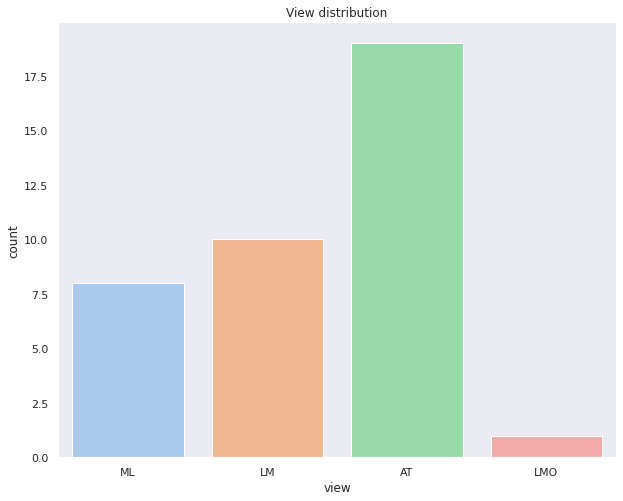

In [18]:
splot = sns.countplot(x = train_df['view'][(train_df['view']!= "CC") & (train_df['view']!= "MLO")], palette='pastel')
splot.set_title("View distribution", fontsize = 12);

### How many cancer images were invasive? How many negative cases (normal) were difficult?

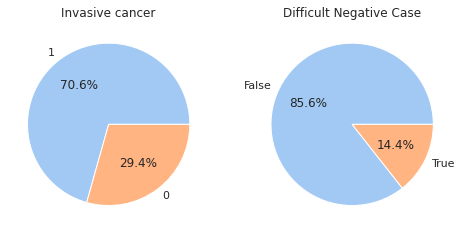

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# pie chart
s_cancer= cancer_df['invasive'].value_counts()
axes[0].pie(s_cancer, autopct="%.1f%%", labels=s_cancer.keys(), colors=colors)
axes[0].set_title("Invasive cancer")

s_normal = normal_df['difficult_negative_case'].value_counts()
axes[1].pie(s_normal, autopct="%.1f%%", labels = s_normal.keys(), colors=colors)
axes[1].set_title("Difficult Negative Case");

### Birads Distribution
0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
only 0 , 1, and 2 are provided as mentioned on the competition's page

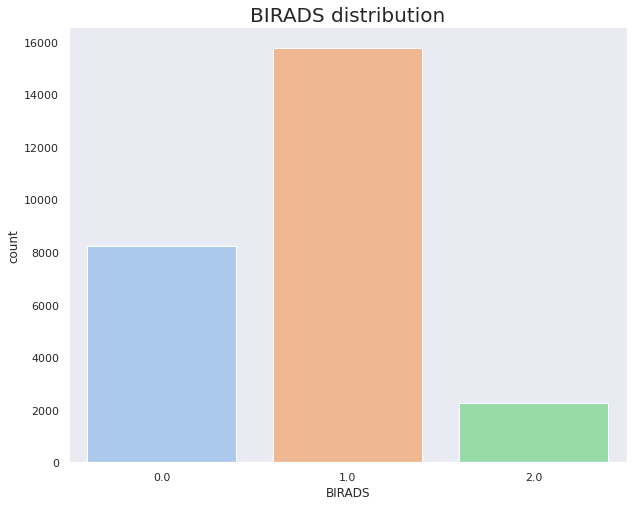

In [20]:
splot = sns.countplot(x = train_df['BIRADS'], palette='pastel')
splot.set_title("BIRADS distribution", fontsize = 20); 

### Biopsy percentage in both classes

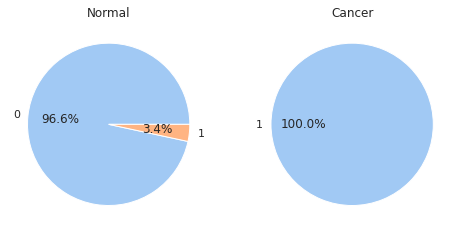

In [21]:
# biopsy in both classes
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# pie chart
s_normal= normal_df['biopsy'].value_counts()
axes[0].pie(s_normal, autopct="%.1f%%", labels = s_normal.keys(), colors=colors)
axes[0].set_title("Normal")

s_cancer = cancer_df['biopsy'].value_counts()
axes[1].pie(s_cancer, autopct="%.1f%%", labels = s_cancer.keys(), colors=colors)
axes[1].set_title("Cancer");

**all the cases diagnosed with cancer were confirmed with biopsy. However,  only 3% of the normal cases were sent for biopsy (I suspect that those included in difficult negative cases flag)**

### Implants percentage

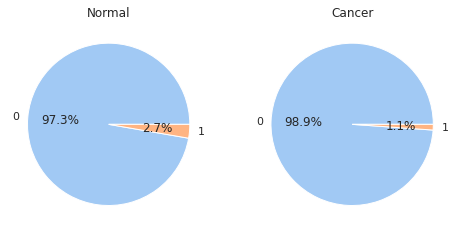

In [22]:
# implants in both classes
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
# pie chart
s_normal= normal_df['implant'].value_counts()
axes[0].pie(s_normal, autopct="%.1f%%", labels = s_normal.keys(), colors=colors)
axes[0].set_title("Normal")

s_cancer = cancer_df['implant'].value_counts()
axes[1].pie(s_cancer, autopct="%.1f%%", labels = s_cancer.keys(), colors=colors)
axes[1].set_title("Cancer");

### Mammography machines distribution

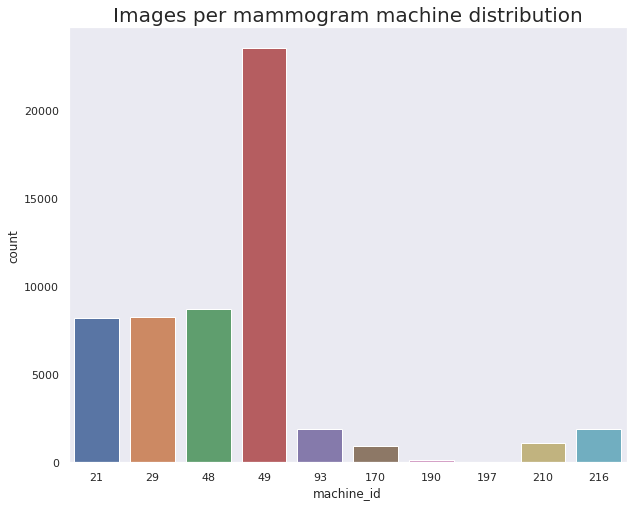

In [23]:
splot = sns.countplot(x = train_df['machine_id'])
splot.set_title("Images per mammogram machine distribution", fontsize = 20); 

## Images exploration

In [24]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

In [25]:
# get a row from the normal df
row = normal_df.iloc[10]
dcm = pydicom.read_file('./train_images/'+str(row.patient_id)+'/'+str(row.image_id)+'.dcm')
img = dcm.pixel_array
print(row)

site_id                            2
patient_id                     10025
image_id                   288394860
laterality                         R
view                              CC
age                             75.0
cancer                             0
biopsy                             0
invasive                           0
BIRADS                           NaN
implant                            0
density                          NaN
machine_id                        29
difficult_negative_case        False
Name: 10, dtype: object


In [26]:
# dicom metadata
dcm

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10025.1.288394860
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10025.1.288394860
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183905.340002'
(0010, 0020) Patient ID                          LO: '10025'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10025
(0020, 000e) Series Instance U

**images are stored in lossless jpeg format so this command is needed to install the required dependencies </br> !pip install -qU python-gdcm pydicom pylibjpeg </br>
!pip install -U pylibjpeg-openjpeg pylibjpeg-libjpeg**

In [27]:
print(img.shape)
print(img.dtype)
print(img.min())
print(img.max())

(5355, 4915)
uint16
1503
3588


In [28]:
dcm.PhotometricInterpretation == "MONOCHROME1"

True

**in this case the photometric interpretation is monochrome1 and therefore we need to invert the pixels, also we will need to apply the voi lut** 

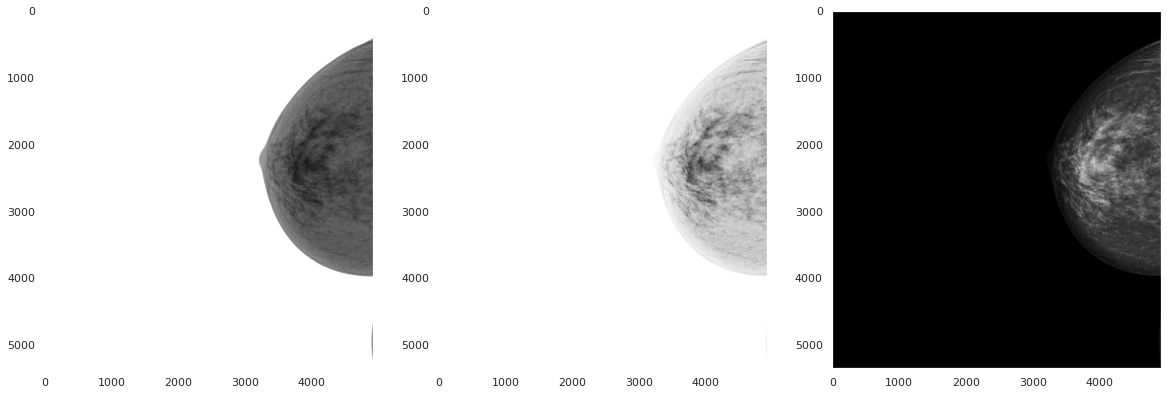

In [29]:
plt.figure(figsize=(20,10))
rescaled_lut = apply_voi_lut(img, dcm)
img_inverted = np.amax(rescaled_lut) - rescaled_lut
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(rescaled_lut, cmap='gray')
plt.subplot(133)
plt.imshow(img_inverted, cmap='gray');

In [30]:
# cancer example
row = cancer_df.iloc[200]
print(row)
dcm = pydicom.read_file('./train_images/'+str(row.patient_id)+'/'+str(row.image_id)+'.dcm')
img = dcm.pixel_array

site_id                             1
patient_id                       1963
image_id                   2090715578
laterality                          L
view                              MLO
age                              67.0
cancer                              1
biopsy                              1
invasive                            1
BIRADS                            0.0
implant                             0
density                             B
machine_id                         49
difficult_negative_case         False
Name: 8991, dtype: object


In [31]:
dcm

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.1963.1.2090715578
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.1963.1.2090715578
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184011.386010'
(0010, 0020) Patient ID                          LO: '1963'
(0018, 11a0) Body Part Thickness                 DS: '68.0'
(0018

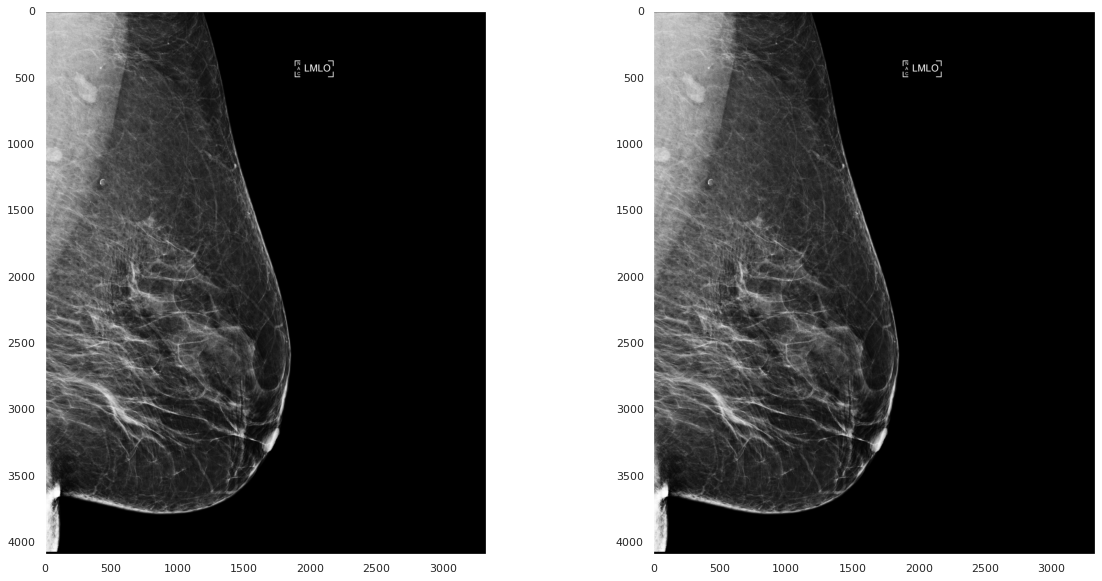

In [32]:
plt.figure(figsize=(20,10))
rescaled_lut = apply_voi_lut(img, dcm)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(rescaled_lut, cmap='gray')

**this example has the VOI already applied, it's Photometric Interpretation  is MONOCHROME2 so it is not inverted, however we can see the LMLO artifact**

## Insights: 
1. some machines apply linear LUT while other apply sigmoid.
2. some photemetric correction maybe needed
3. image size is also dependent on the machine so we might take this into consideration when resizing for example make sure that the background is zero and then crop it and resize with keeping the aspect ratio
4. image artifacts are present in some images so we need to remove them in the preprocessing